In [124]:
# step-1
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas

In [125]:
#import the data file
df1=pd.read_csv("SolarPrediction.csv")
#print(df1)

In [126]:
#step 3
print(df1.describe())

           UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%         

# 1.Pre-process

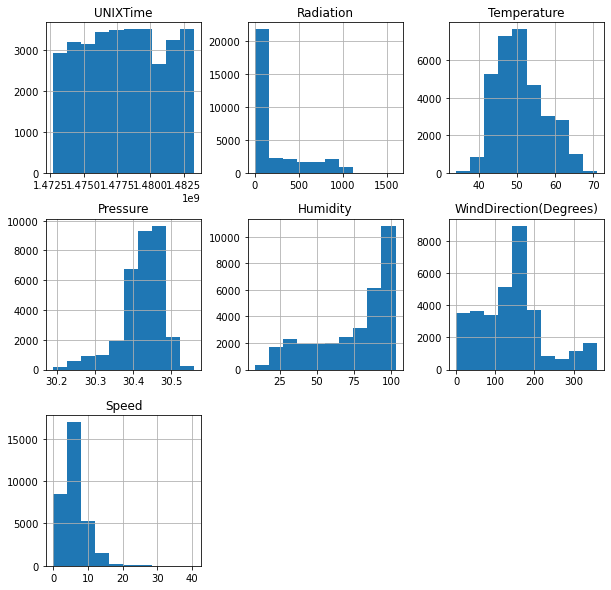

In [127]:
df1.hist(figsize=(10,10))
plt.show()

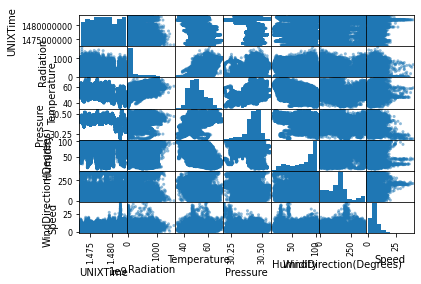

In [128]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df1)
plt.show()

In [129]:
#step 6
c=df1.corr(method='pearson')
print("The correlation matrix: ",c)

The correlation matrix:                          UNIXTime  Radiation  Temperature  Pressure  Humidity  \
UNIXTime                1.000000  -0.081286    -0.369169 -0.332016 -0.063117   
Radiation              -0.081286   1.000000     0.734955  0.119016 -0.226171   
Temperature            -0.369169   0.734955     1.000000  0.311173 -0.285055   
Pressure               -0.332016   0.119016     0.311173  1.000000 -0.223973   
Humidity               -0.063117  -0.226171    -0.285055 -0.223973  1.000000   
WindDirection(Degrees)  0.152613  -0.230324    -0.259421 -0.229010 -0.001833   
Speed                   0.173860   0.073627    -0.031458 -0.083639 -0.211624   

                        WindDirection(Degrees)     Speed  
UNIXTime                              0.152613  0.173860  
Radiation                            -0.230324  0.073627  
Temperature                          -0.259421 -0.031458  
Pressure                             -0.229010 -0.083639  
Humidity                             -0

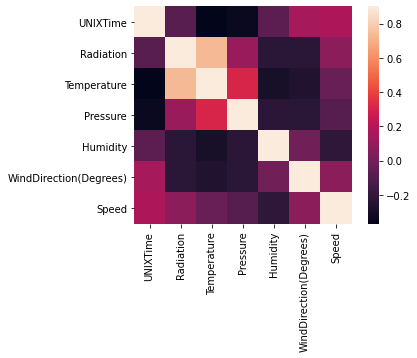

In [130]:
#step -7

#Correlation map to see how features are correlated with radiation
corrmat = df1.corr()
plt.subplots()
#figsize=(12,9)
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [131]:
# step-8
# TimeSunRise and TimeSunSet columns are used to find length of the day.
#It is then converted into seconds
# ie the length of the day is measured in seconds
time1=df1[['TimeSunRise']].values
time2=df1[['TimeSunSet']].values
i=0
DayLen=[]
for i in range(len(time1)):
    temp1=(int(time1[i][0][0:2])*3600+int(time1[i][0][3:5])*60+int(time1[i][0][6:8]))
    temp2=(int(time2[i][0][0:2])*3600+int(time2[i][0][3:5])*60+int(time2[i][0][6:8]))
    DayLen.append(temp2-temp1)
    
DayLen
df1['DayLengthinsec']=DayLen
print(df1)

         UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSu

In [132]:

# The time variable is converted into seconds.
#the time at which data was collected
time=df1[['Time']].values
#print(time[0][0][0:2]) #hour
#print(time[0][0][3:5]) #min
#print(time[0][0][6:8]) #second

i=0
TimeX=[]
for i in range(len(time)):
    temp=(int(time[i][0][0:2])*3600+int(time[i][0][3:5])*60+int(time[i][0][6:8]))
    TimeX.append(temp)

TimeX
df1['time_in_sec']=TimeX
print(df1)

         UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSu

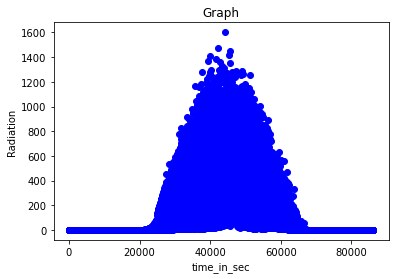

In [133]:

# graph is plotted between time and radiation
# it comes out as perfectly skewed

plt.scatter(df1.time_in_sec,df1.Radiation,color='blue')
plt.xlabel("time_in_sec")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

The p-value for both are 0. 
We try to play around, and muliply the two values of these two dataframes, and again find least square fits.

In [134]:
# step-12

model=smf.ols('Radiation ~ Temperature+ Humidity +Humidity*Temperature', df1) 
Fitting_results=model.fit() 
print(Fitting_results.summary().tables[1])

                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2336.4971     27.626    -84.575      0.000   -2390.646   -2282.349
Temperature             49.7311      0.515     96.473      0.000      48.721      50.741
Humidity                 9.8844      0.386     25.588      0.000       9.127      10.642
Humidity:Temperature    -0.1952      0.007    -26.356      0.000      -0.210      -0.181


The p-values are again 0 , the standard error for Humidity*Temperature is 0.007 . This column appears to be very important.

In [135]:

# therefore we make it a new data frame
Temp_multiply_humid=df1.Humidity *df1.Temperature
df1['Temp_multiply_humid']=Temp_multiply_humid
print(df1)

         UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSu

Only month and day of month look important, so we create 2 new dataframes named Month and Day_of_Month.

In [136]:
#step 14
df1['Month']=[d.split('/')[0] for d in df1.Data]
df1['Day_of_month']=[d.split('/')[1] for d in df1.Data]
print(df1)

         UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSu

the name WindDirection(Degrees) cannot be used because of parenthesis. We can not rename a data frame.
So we save its values into a new dataframe.

In [137]:
#step 15
df1['wind_dir'] = df1['WindDirection(Degrees)']
print(df1)

         UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSu

In [138]:
#step 16
#We drop the following columns
df1 = df1.drop(['UNIXTime','Data','TimeSunRise','TimeSunSet','WindDirection(Degrees)'], axis=1)
print(df1)

           Time  Radiation  Temperature  Pressure  Humidity  Speed  \
0      23:55:26       1.21           48     30.46        59   5.62   
1      23:50:23       1.21           48     30.46        58   3.37   
2      23:45:26       1.23           48     30.46        57   3.37   
3      23:40:21       1.21           48     30.46        60   3.37   
4      23:35:24       1.17           48     30.46        62   5.62   
...         ...        ...          ...       ...       ...    ...   
32681  00:20:04       1.22           44     30.43       102   6.75   
32682  00:15:01       1.17           44     30.42       102   6.75   
32683  00:10:01       1.20           44     30.42       102   9.00   
32684  00:05:02       1.23           44     30.42       101   7.87   
32685  00:00:02       1.20           44     30.43       101   3.37   

       DayLengthinsec  time_in_sec  Temp_multiply_humid Month Day_of_month  \
0               43200        86126                 2832     9           29   
1  

In [139]:
#Transform the time_in_sec and month columns to integer labels

le = preprocessing.LabelEncoder()
df1.time_in_sec = le.fit_transform(df1.time_in_sec)
print(df1.Month.unique())
df1.Month = le.fit_transform(df1.Month)
df1.Day_of_month=le.fit_transform(df1.Day_of_month)
print(df1)
print(df1.Month.unique())

['9' '10' '11' '12']
           Time  Radiation  Temperature  Pressure  Humidity  Speed  \
0      23:55:26       1.21           48     30.46        59   5.62   
1      23:50:23       1.21           48     30.46        58   3.37   
2      23:45:26       1.23           48     30.46        57   3.37   
3      23:40:21       1.21           48     30.46        60   3.37   
4      23:35:24       1.17           48     30.46        62   5.62   
...         ...        ...          ...       ...       ...    ...   
32681  00:20:04       1.22           44     30.43       102   6.75   
32682  00:15:01       1.17           44     30.42       102   6.75   
32683  00:10:01       1.20           44     30.42       102   9.00   
32684  00:05:02       1.23           44     30.42       101   7.87   
32685  00:00:02       1.20           44     30.43       101   3.37   

       DayLengthinsec  time_in_sec  Temp_multiply_humid  Month  Day_of_month  \
0               43200         8288                 2832   

In [140]:

#We now check the data-set
print(df1.columns)

Index(['Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'Speed',
       'DayLengthinsec', 'time_in_sec', 'Temp_multiply_humid', 'Month',
       'Day_of_month', 'wind_dir'],
      dtype='object')


In [141]:
#step 19
c=df1.corr(method='pearson')
print("The correlation matrix: ",c)

The correlation matrix:                       Radiation  Temperature  Pressure  Humidity     Speed  \
Radiation             1.000000     0.734955  0.119016 -0.226171  0.073627   
Temperature           0.734955     1.000000  0.311173 -0.285055 -0.031458   
Pressure              0.119016     0.311173  1.000000 -0.223973 -0.083639   
Humidity             -0.226171    -0.285055 -0.223973  1.000000 -0.211624   
Speed                 0.073627    -0.031458 -0.083639 -0.211624  1.000000   
DayLengthinsec        0.073456     0.355509  0.278614  0.087356 -0.174944   
time_in_sec           0.013143     0.204372  0.090749  0.077038 -0.057445   
Temp_multiply_humid  -0.020549     0.011732 -0.124006  0.947963 -0.225835   
Month                -0.035496    -0.010335 -0.199199  0.072388 -0.035145   
Day_of_month         -0.025539    -0.070179 -0.062723  0.052788 -0.075062   
wind_dir             -0.230324    -0.259421 -0.229010 -0.001833  0.073092   

                     DayLengthinsec  time_in_sec  

In [142]:
c=df1['Pressure'].corr(df1['Speed'])
print("The correlation matrix: ",c)

The correlation matrix:  -0.08363929418151311


In [143]:
Presssure_multiply_speed=df1.Pressure *df1.Speed
df1['Presssure_multiply_speed']=Presssure_multiply_speed

In [144]:
c=df1['Month'].corr(df1['Humidity'])
print("The correlation matrix: ",c)

The correlation matrix:  0.0723876937647604


In [145]:
Month_multiply_Temperature=df1.Temperature *df1.Month
df1['Month_multiply_Temperature']=Month_multiply_Temperature

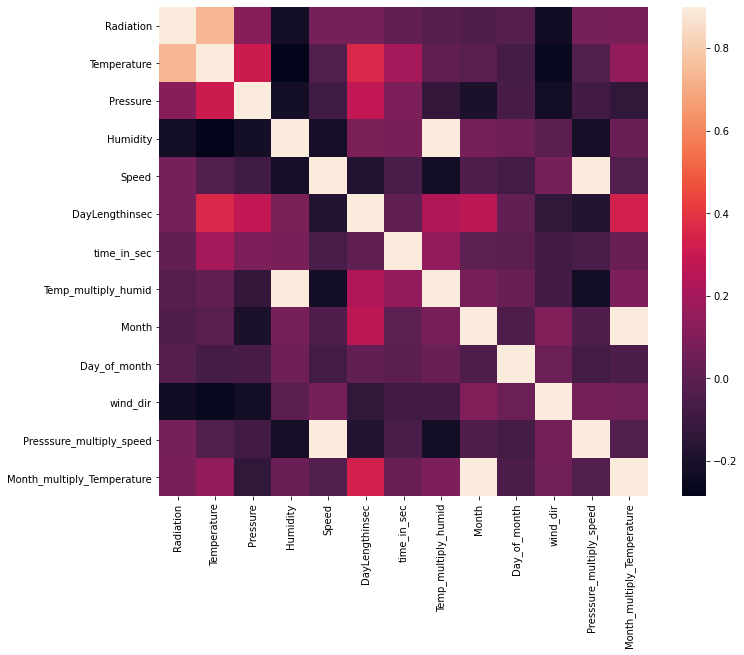

In [146]:

#Correlation map to see how features are correlated with Radiation
corrmat = df1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [147]:
pclass_group=df1.groupby(['Month']).mean()
print(pclass_group)

        Radiation  Temperature   Pressure   Humidity     Speed  \
Month                                                            
0      230.582292    52.468654  30.438463  78.946378  5.880243   
1      226.727750    50.785007  30.445780  62.384959  6.852886   
2      141.283240    47.608893  30.374428  79.526458  6.733328   
3      229.804828    53.681138  30.432098  79.485776  5.457367   

       DayLengthinsec  time_in_sec  Temp_multiply_humid  Day_of_month  \
Month                                                                   
0        42065.502777  4211.301666          4083.771454     15.006008   
1        40351.122646  4148.892685          3099.453404     14.366731   
2        39428.098971  4200.959946          3760.574351     13.842479   
3        44096.076581  4214.919240          4233.860725     14.134556   

         wind_dir  Presssure_multiply_speed  Month_multiply_Temperature  
Month                                                                    
0      126.03685

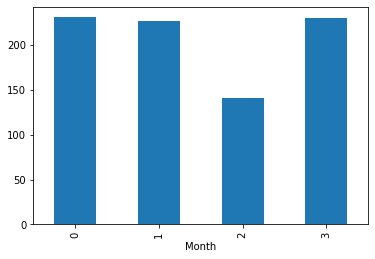

In [148]:
pclass_group['Radiation'].plot.bar()
plt.show()

In [149]:
#We drop the following columns
df1 = df1.drop(['Time'], axis=1)

In [150]:
from sklearn.model_selection import train_test_split
X=df1[['Temperature', 'Pressure', 'Humidity', 'Speed',
     'DayLengthinsec', 'time_in_sec', 'Temp_multiply_humid', 'Month',
       'wind_dir','Day_of_month']]


Y=df1.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

In [151]:
linreg= LinearRegression().fit(X_train, Y_train) 
print("Score: ",linreg.score(X,Y))
from sklearn.metrics import mean_squared_error
Target_predicted= linreg.predict(X_test) 
MSE=mean_squared_error(Y_test,Target_predicted) 
print('mean square error', MSE)

Score:  0.6227757478692386
mean square error 37383.443522780006


# 2. Data Visualization

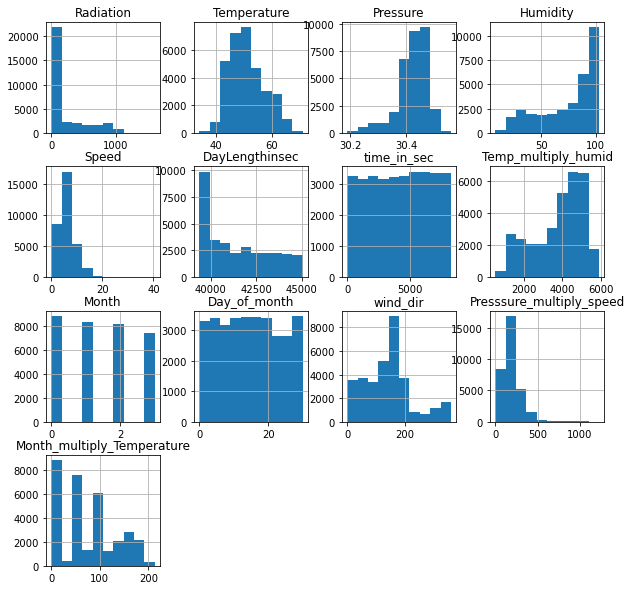

In [152]:
df1.hist(figsize=(10,10))
plt.show()

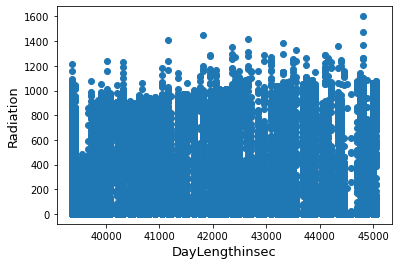

In [153]:
fig, ax = plt.subplots()
ax.scatter(x = df1['DayLengthinsec'], y = df1['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('DayLengthinsec', fontsize=13)
plt.show()

In [154]:
df1 = df1.drop(df1[(df1['Radiation']>1400)].index)



In [155]:
df1 = df1.drop(df1[(df1['wind_dir']>8000)].index)




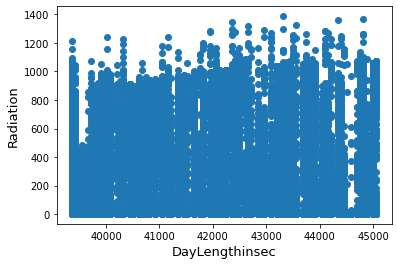

In [156]:
fig, ax = plt.subplots()
ax.scatter(x = df1['DayLengthinsec'], y = df1['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('DayLengthinsec', fontsize=13)
plt.show()

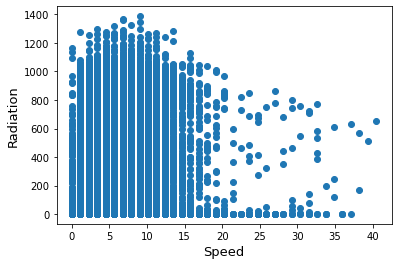

In [157]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Speed'], y = df1['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('Speed', fontsize=13)
plt.show()

In [158]:
df1 = df1.drop(df1[(df1['Speed']>35)].index)

In [159]:
print(df1.shape)

(32672, 13)


In [160]:
df1 = df1.drop(df1[(df1['Radiation']>1300)].index)


In [161]:
print(df1.shape)

(32666, 13)


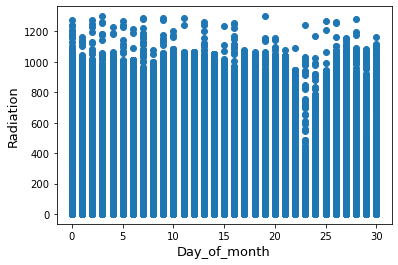

In [162]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Day_of_month'], y = df1['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('Day_of_month', fontsize=13)
plt.show()

In [163]:
df1 = df1.drop(df1[(df1['Radiation']>1200)].index)

In [164]:
print(df1.shape)

(32628, 13)


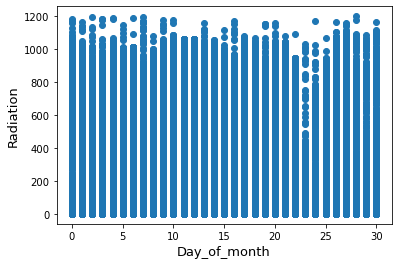

In [165]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Day_of_month'], y = df1['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('Day_of_month', fontsize=13)
plt.show()

# 3. Model Fitting

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.svm import SVR

In [167]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['Radiation'] = Target_predicted
sub.to_csv('submission.csv',index=False)

In [168]:
print(df1.shape)

(32628, 13)


In [169]:
df1.to_csv("m_l_data_processed.csv")

# Function to apply new models

In [170]:
X=df1[['Temperature', 'Pressure', 'Humidity', 'Speed',
       'DayLengthinsec', 'time_in_sec', 'Temp_multiply_humid', 'Month',
       'wind_dir','Day_of_month']]
Y=df1.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
def model_score_error(model):
    prepared_model=model.fit(X_train, Y_train)
    x=prepared_model.score(X_test,Y_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X_test) 
    MSE=mean_squared_error(Y_test,Target_predicted) 
    print('mean square error', MSE)

# Lasso Regression

In [171]:
# lasso is very sensitive to outliers. so make it more robust

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=50))

In [172]:
model_score_error(lasso)

Score:  0.6267804172415221
mean square error 36505.27404753731


# Elastic net regression

In [173]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [174]:
# scores
model_score_error(ENet)

Score:  0.626785317279097
mean square error 36504.79476610949


# Gradient Boosting Regression

In [175]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [176]:
# scores
model_score_error(GBoost)

Score:  0.932582527439858
mean square error 6594.223414565466


# Neural Network Model : Multi Layer Perceptron

In [177]:

MLP = MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [178]:
# scores
model_score_error(MLP)

Score:  0.8125790648129837
mean square error 18331.97644850093


# RandomForest Regression

In [179]:
RandomForest = RandomForestRegressor(n_estimators=300, random_state=0).fit(X_train, Y_train)

In [180]:
# scores
model_score_error(RandomForest)

Score:  0.9419872678892867
mean square error 5674.3289521290535


# Decision Tree Regressor

In [181]:
DTregressor = DecisionTreeRegressor(random_state=0).fit(X_train, Y_train)

In [182]:
# scores
model_score_error(DTregressor)

Score:  0.8898733986712066
mean square error 10771.679587973518


# XGBoost

In [183]:

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=4200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread=-1)


#SVR 
Scores:  -0.412483280096
mean square error 138157.512653
\
#LinearRegression
Score:  0.622775747869
mean square error 37383.4435228
\
#lasso
Score:  0.626780417242
mean square error 36505.2740475
\
#ENet
Score:  0.626785317279
mean square error 36504.7947661
\
#MLP
Score:  0.803590072051
mean square error 19211.205887
\
#Decision tree 
score:  0.886921645453
mean square error 11060.3958428
\
#adaboost
Score:  0.928386215211
mean square error 1.38872120733
\
#RandomForestRegressor 
Score  0.937633857199
mean square error 6180.96544671
\
#GBoost
Score:  0.983160988421
mean square error 0.326538983515
\
#XGBRegressor
Score:  0.989414581383
mean square error 0.0115656619442

In [184]:
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df1[feat] = boxcox1p(df1[feat], lam)

NameError: name 'skewed_feats' is not defined

# Improving Scores

In [ ]:
# Simplest Stacking approach : Averaging base models
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    # define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self    
    # predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [ ]:
# Averaging base models Score
averaged_models = AveragingModels(models = (ENet, GBoost,lasso))
model_score_error(averaged_models)

Score:  0.794244680275
mean square error 20125.2953497


In [ ]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['Radiation'] = Target_predicted
sub.to_csv('submission.csv',index=False)

# AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)
model_score_error(regr_2)

Score:  0.928386215211
mean square error 1.38872120733
